In [3]:
import pandas as pd # biblioteca para tratar dados com dataframe
import seaborn as srn # biblioteca para uso de gráficos.
import statistics as sts # biblioteca para uso de funções estatisticas.

In [4]:
#importar os dados
dataset = pd.read_csv("Dados.csv",sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
dataset.shape

(999, 12)

In [6]:
#problema de nome das colunas. 
dataset.columns = ["ID","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","CartaCredito",
                   "Ativo","Salario","Saiu"]

In [7]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [8]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot: xlabel='Estado'>

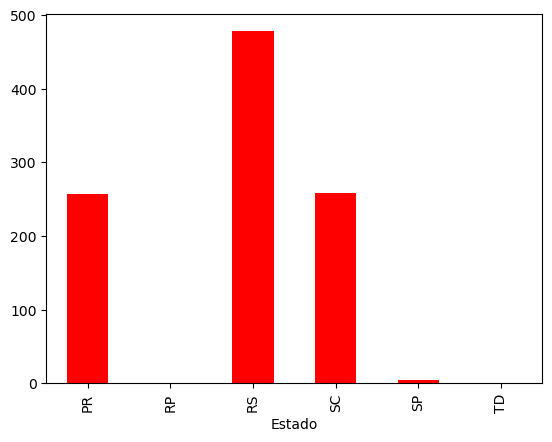

In [9]:
agrupado.plot.bar(color="red")

In [10]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot: xlabel='Genero'>

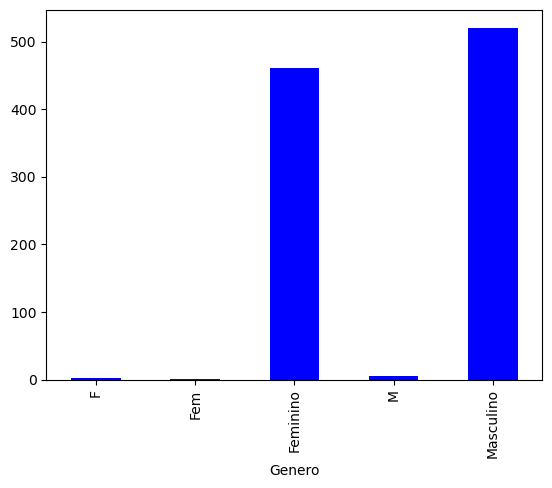

In [11]:
agrupado.plot.bar(color="blue")

In [12]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

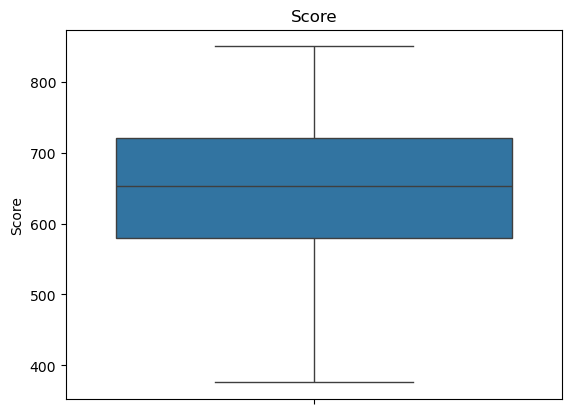

In [13]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

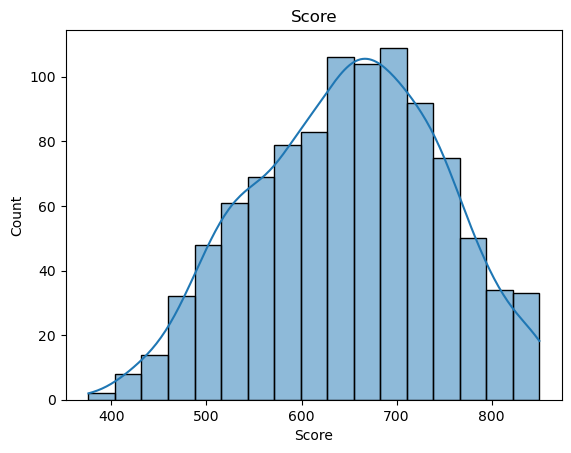

In [14]:
srn.histplot(dataset['Score'], kde=True).set_title('Score')

In [15]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

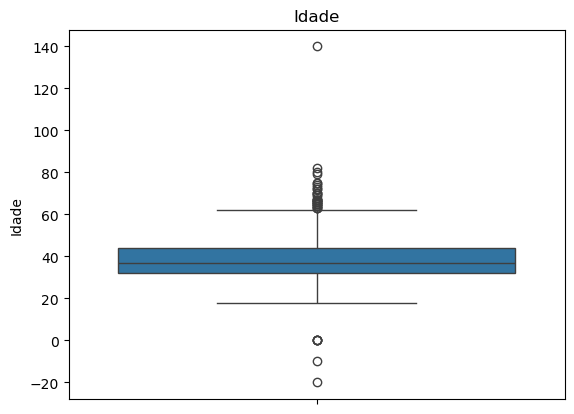

In [16]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

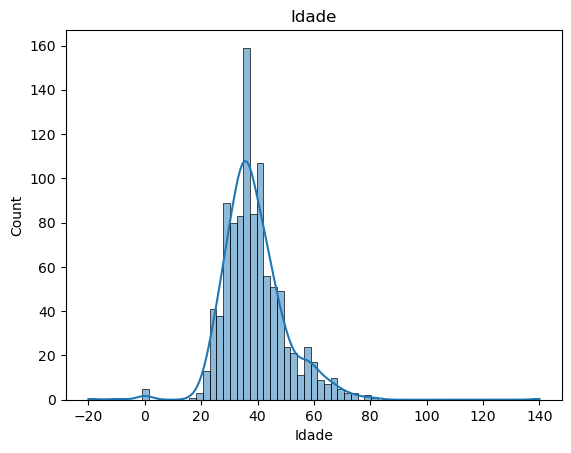

In [17]:
srn.histplot(dataset['Idade'], kde=True).set_title('Idade')

In [18]:
#campo saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'SALDO')

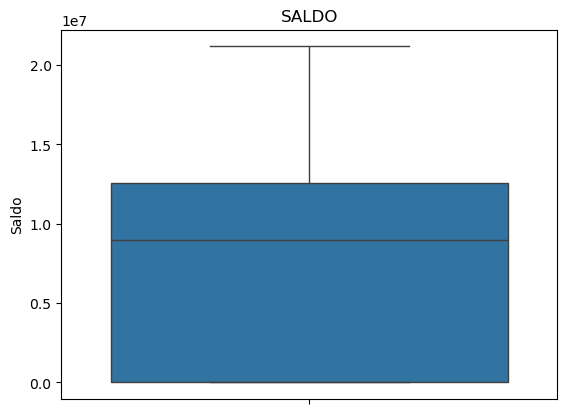

In [19]:
srn.boxplot(dataset['Saldo']).set_title('SALDO')

<AxesSubplot: xlabel='Saldo', ylabel='Count'>

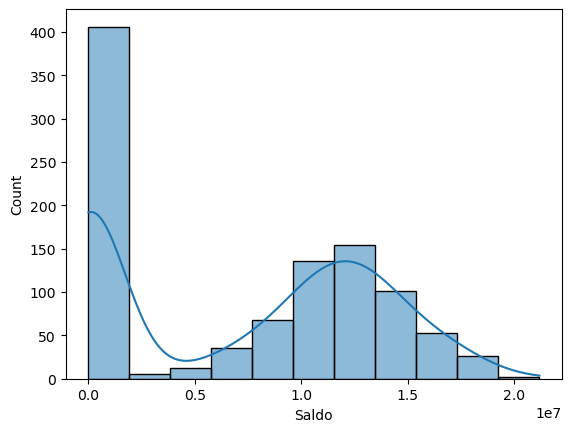

In [20]:
srn.histplot(dataset['Saldo'], kde=True)

In [21]:
#salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

<AxesSubplot: ylabel='Salario'>

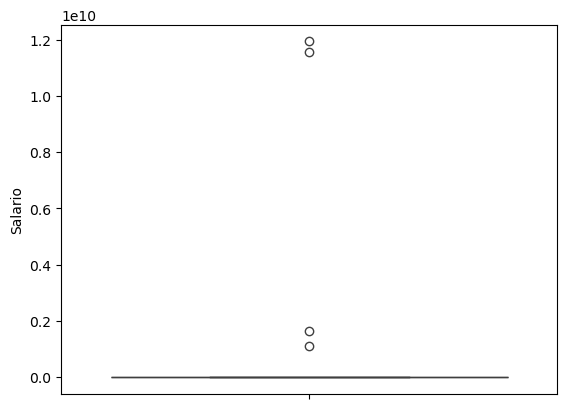

In [22]:
srn.boxplot(dataset['Salario'])

<AxesSubplot: xlabel='Salario', ylabel='Count'>

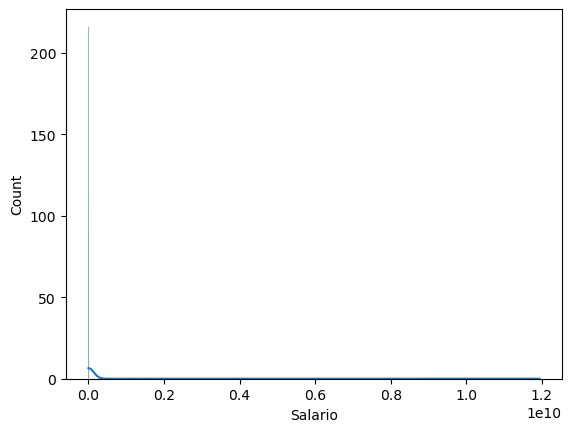

In [23]:
srn.histplot(dataset['Salario'], kde=True)

In [24]:
dataset.isnull().sum()

ID              0
Score           0
Estado          0
Genero          8
Idade           0
Patrimonio      0
Saldo           0
Produtos        0
CartaCredito    0
Ativo           0
Salario         7
Saiu            0
dtype: int64

In [25]:
# TRATAMENTO DOS DADOS. 

In [26]:
#tratamento do campo salario relacionado aos valores null
dataset['Salario'].isnull().sum()

7

In [27]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [28]:
dataset.fillna({'Salario':mediana},inplace=True)

In [29]:
dataset['Salario'].isnull().sum()

0

In [30]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [31]:
dataset['Genero'].isnull().sum()

8

In [32]:
dataset.fillna({'Genero':'Masculino'},inplace=True)

In [33]:
dataset['Genero'].isnull().sum()

0

In [34]:
#padronização de acordo com o domínio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'


In [35]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [36]:
#idade esta fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [37]:
dataset.loc[    (dataset['Idade'] < 0)  |  (dataset['Idade'] > 120)    ]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [38]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [39]:
media = sts.mean(dataset['Idade'])
media

38.9029029029029

In [40]:
dataset.loc[    (dataset['Idade'] < 0)  |  (dataset['Idade'] > 120), 'Idade'] = mediana

In [41]:
dataset.loc[    (dataset['Idade'] < 0)  |  (dataset['Idade'] > 120)    ]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu


In [42]:
#dados duplicidade
dataset[dataset.duplicated(['ID'],keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [43]:
dataset.drop_duplicates(subset="ID",keep='first',inplace=True)

In [44]:
dataset[dataset.duplicated(['ID'],keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu


In [45]:
#tratamento do campo estado, fora do dominio 
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [46]:
dataset.loc[dataset['Estado'].isin( ['SP','RP','TD']), 'Estado'] = 'RS'

In [47]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [48]:
#tratamento de dados salario com outliers
desvio = sts.stdev(dataset['Salario'])
desvio

528988918.4679201

In [49]:
dataset.loc[dataset['Salario'] >= 2*desvio]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [50]:
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [51]:
media = sts.mean(dataset['Salario'])
media

35058789.12725451

In [52]:
dataset.loc[dataset['Salario'] >= 2*desvio, 'Salario'] = mediana

In [53]:
dataset.loc[dataset['Salario'] >= 2*desvio]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaCredito,Ativo,Salario,Saiu
